## Implementation

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
def detect_outliers(data, method='zscore'):
    outliers_dict = {}
    for column in data.columns:
        if method == 'zscore':
            z_scores = (data[column] - data[column].mean()) / data[column].std()
            outliers = np.where(np.abs(z_scores) > 3)[0]
        elif method == 'boxplot':
            q1 = np.percentile(data[column], 25)
            q3 = np.percentile(data[column], 75)
            iqr = q3 - q1
            outliers = np.where((data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr))[0]
        outliers_dict[column] = outliers
    return outliers_dict

In [41]:
# Leer el archivo CSV
data2 = pd.read_csv('housing.csv', usecols=['total_rooms', 'total_bedrooms', 'median_income'])

In [42]:
# Obtener datos de las columnas que uno seleccione
outliers_zscore = detect_outliers(data2, method='zscore')
outliers_boxplot = detect_outliers(data2, method='boxplot')

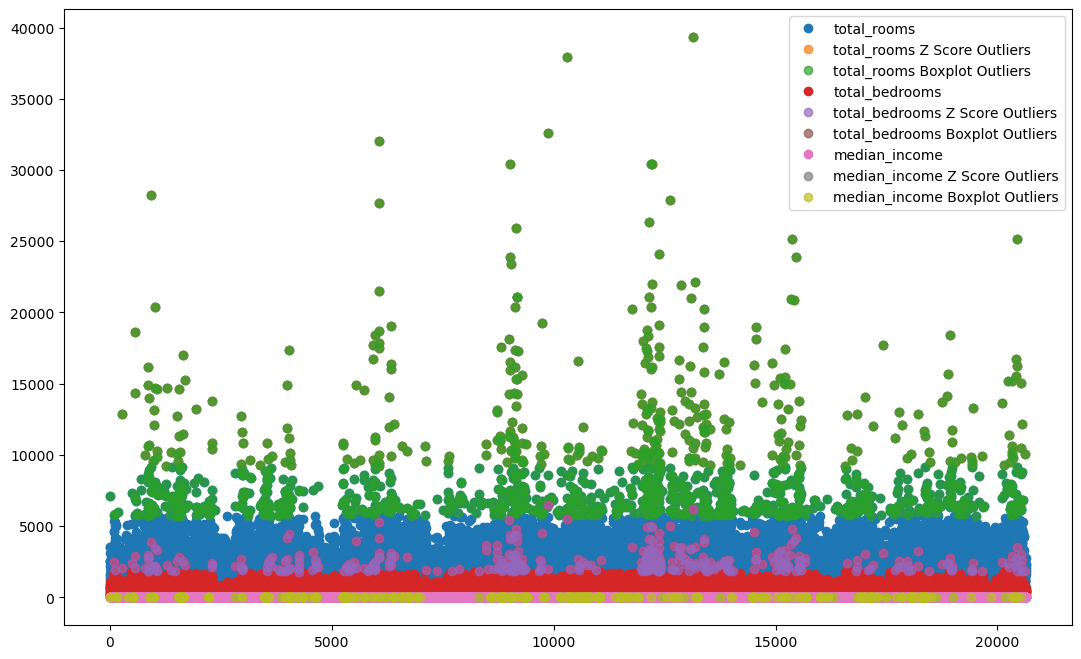

In [43]:
# Visualizar outliers
fig, ax = plt.subplots(figsize=(13, 8))
for column in data2.columns:
    ax.plot(data2[column], linestyle='', marker='o', label=column)
    ax.plot(outliers_zscore[column], data2[column][outliers_zscore[column]], linestyle='', marker='o', label=f'{column} Z Score Outliers', alpha=0.7)
    ax.plot(outliers_boxplot[column], data2[column][outliers_boxplot[column]], linestyle='', marker='o', label=f'{column} Boxplot Outliers', alpha=0.7)
ax.legend()